<a href="https://colab.research.google.com/github/armanhm/INSE6220Project/blob/main/INSE6220_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Arman Hosseinmardi
#ID: 40271290
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s et

In [ ]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()


'3.2.0'

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)


Pandas version:  1.5.3
Seaborn version:  0.12.2


In [ ]:

#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/armanhm/INSE6220Project/main/FoodDataset.csv')
df.head(25)

Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0    87524   442.246011   253.291155    0.819738          90546  0.758651   
1    75166   406.690687   243.032436    0.801805          78789  0.684130   
2    90856   442.267048   266.328318    0.798354          93717  0.637613   
3    45928   286.540559   208.760042    0.684989          47336  0.699599   
4    79408   352.190770   290.827533    0.564011          81463  0.792772   
5    49242   318.125407   200.122120    0.777351          51368  0.658456   
6    42492   310.146072   176.131449    0.823099          43904  0.665894   
7    60952   332.455472   235.429835    0.706058          62329  0.743598   
8    42256   323.189607   172.575926    0.845499          44743  0.698031   
9    64380   366.964842   227.771615    0.784056          66125  0.664376   
10   80437   449.454581   232.325506    0.856043          84460  0.674236   
11   43725   301.322218   186.950629    0.784258          45021  0.697068   
12   43441   276.610829   201.813135    0.683882          45133  0.690856   
13   76792   338.857545   291.359202    0.510584          78842  0.772322   
14   74167   387.798931   247.858123    0.769090          76807  0.680182   
15   33565   261.554331   167.708491    0.767374          35794  0.681551   
16   64670   403.083975   206.484644    0.858829          66419  0.756773   
17   64762   354.293940   235.752463    0.746474          66713  0.694998   
18   43295   304.284467   182.811037    0.799407          44714  0.713838   
19   70699   418.698572   216.596054    0.855799          72363  0.728075   
20   69726   354.176912   252.529208    0.701161          71849  0.734399   
21   57346   330.478438   222.443748    0.739555          59365  0.723609   
22   82028   397.114976   268.333773    0.737169          84427  0.686375   
23   61251   301.507790   273.659941    0.419754          64732  0.643596   
24   96277   447.134523   275.216154    0.788128          97865  0.704057   

    Boundary length  class  
0          1184.040      0  
1          1121.786      0  
2          1208.575      0  
3           844.162      0  
4          1073.251      0  
5           881.836      0  
6           823.796      0  
7           933.366      0  
8           849.728      0  
9           981.544      0  
10         1176.305      0  
11          818.873      0  
12          803.748      0  
13         1042.770      0  
14         1084.729      0  
15          751.413      0  
16         1028.445      0  
17          981.509      0  
18          814.680      0  
19         1061.321      0  
20         1035.501      0  
21          928.272      0  
22         1106.355      0  
23          971.769      0  
24         1181.921      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           900 non-null    int64  
 1   MajorLength      900 non-null    float64
 2   MinorLength      900 non-null    float64
 3   Elongation       900 non-null    float64
 4   Convex Region    900 non-null    int64  
 5   Spread           900 non-null    float64
 6   Boundary length  900 non-null    float64
 7   class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())


Number of duplicated rows is:  0


In [ ]:

print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())


Number of rows with NaNs is:  0


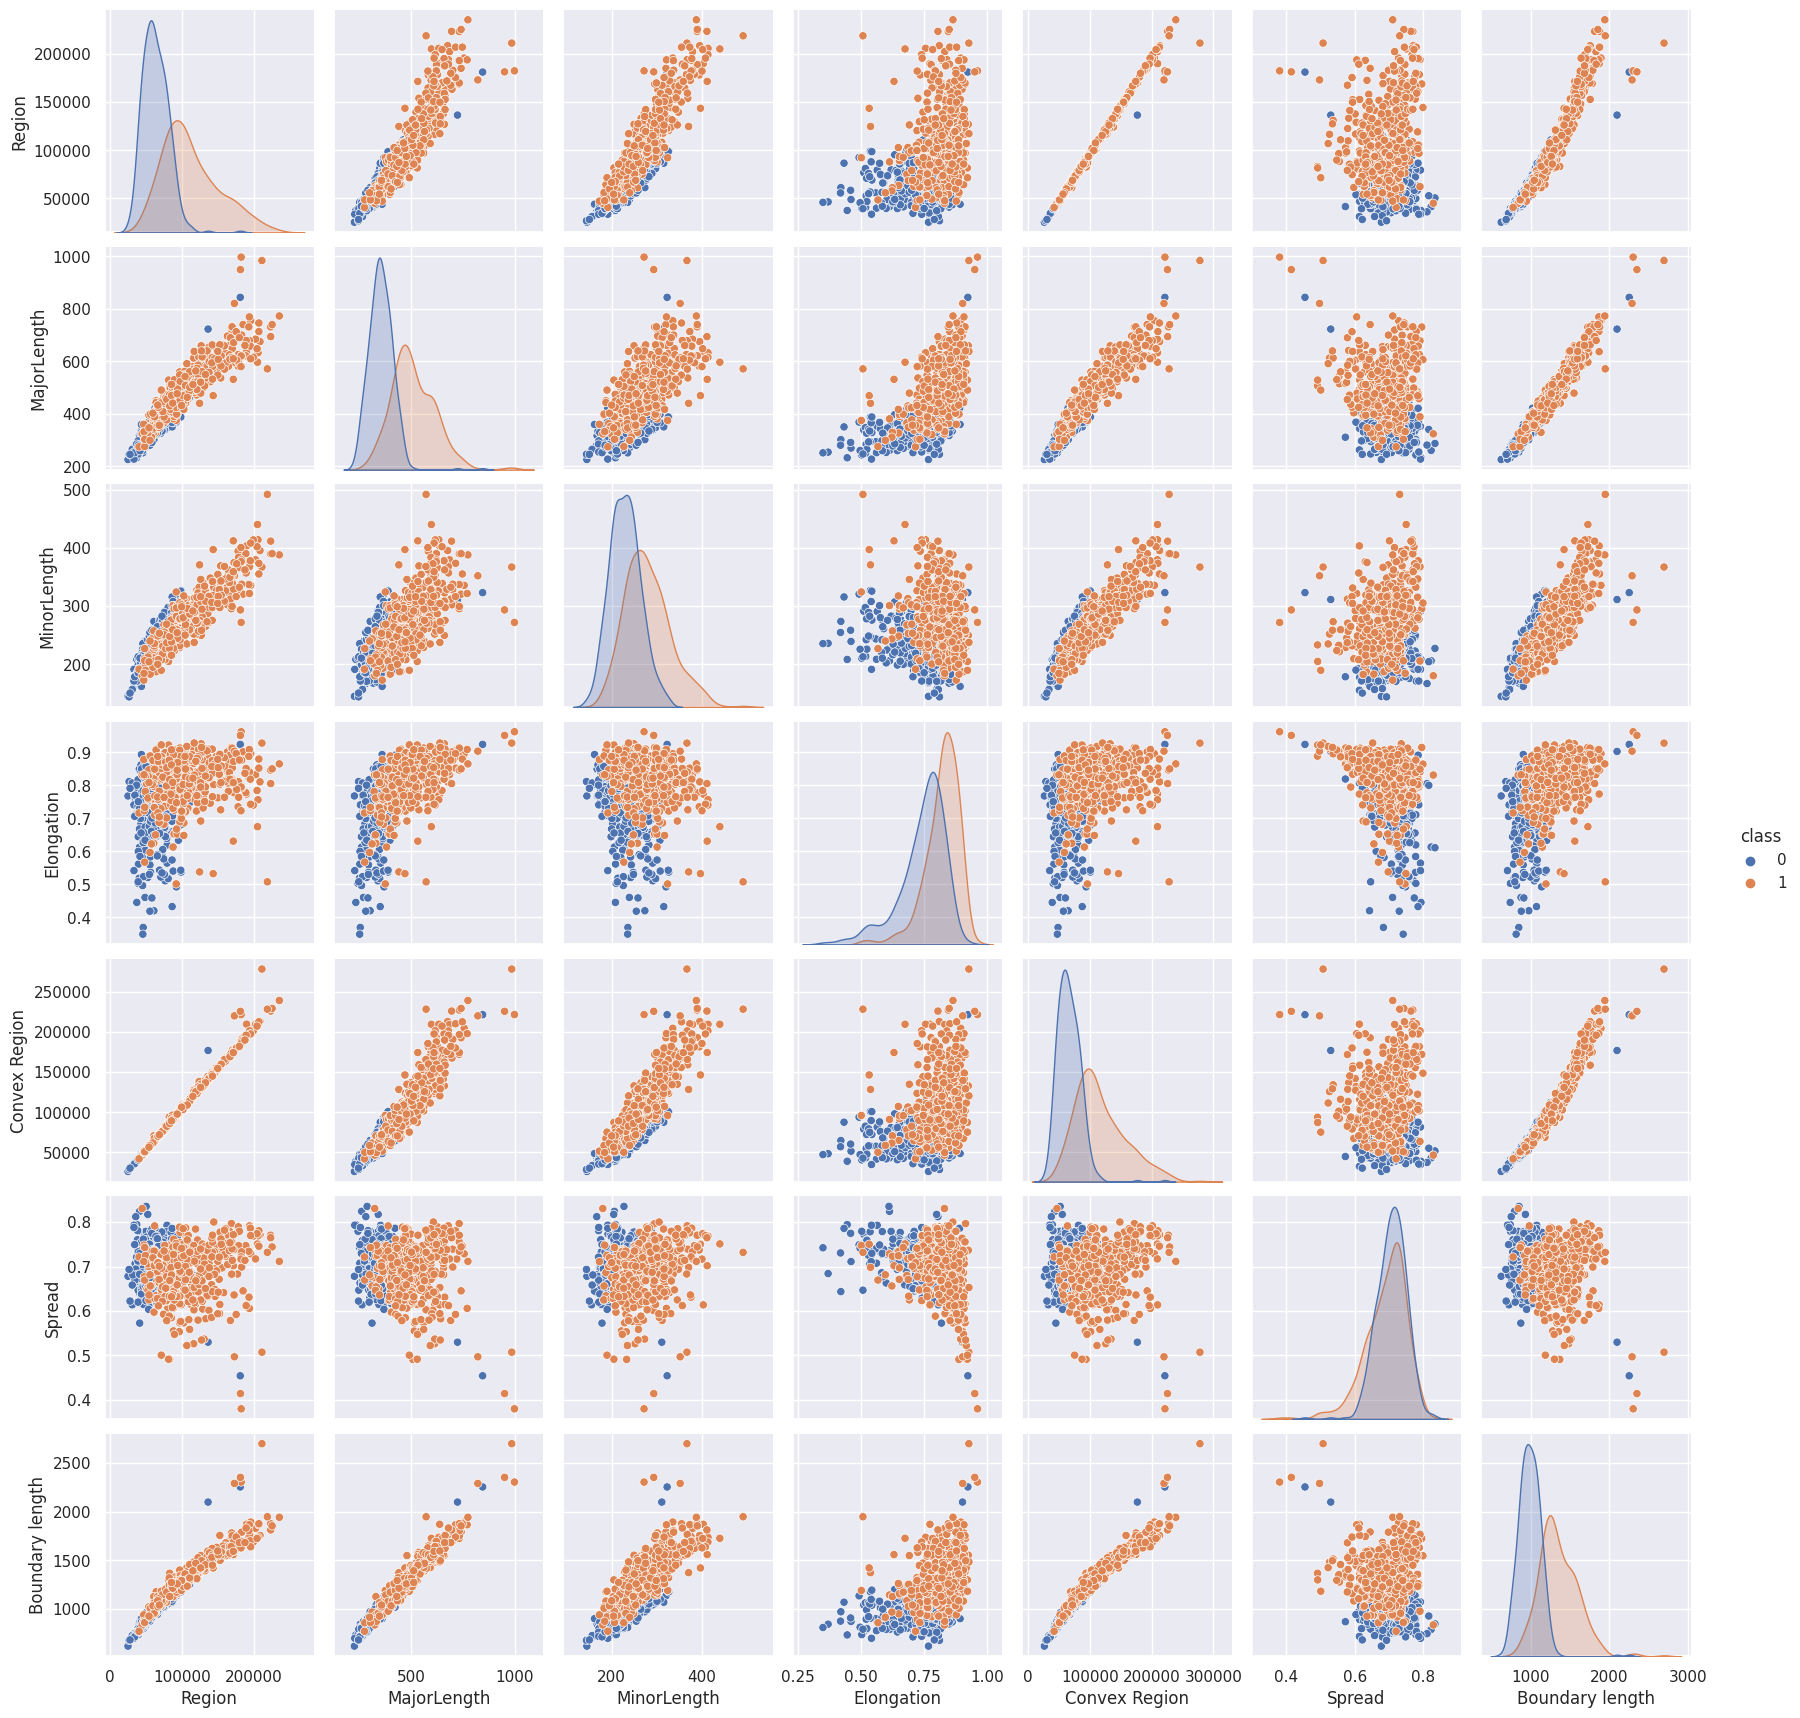

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

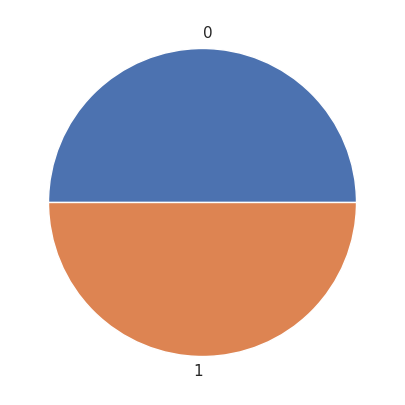

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


In [ ]:
X = df.drop(columns=['class'])
X.head(10)


Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0   87524   442.246011   253.291155    0.819738          90546  0.758651   
1   75166   406.690687   243.032436    0.801805          78789  0.684130   
2   90856   442.267048   266.328318    0.798354          93717  0.637613   
3   45928   286.540559   208.760042    0.684989          47336  0.699599   
4   79408   352.190770   290.827533    0.564011          81463  0.792772   
5   49242   318.125407   200.122120    0.777351          51368  0.658456   
6   42492   310.146072   176.131449    0.823099          43904  0.665894   
7   60952   332.455472   235.429835    0.706058          62329  0.743598   
8   42256   323.189607   172.575926    0.845499          44743  0.698031   
9   64380   366.964842   227.771615    0.784056          66125  0.664376   

   Boundary length  
0         1184.040  
1         1121.786  
2         1208.575  
3          844.162  
4         1073.251  
5          881.836  
6          823.796  
7          933.366  
8          849.728  
9          981.544

In [ ]:
X.describe().transpose()

count          mean           std           min  \
Region           900.0  87804.127778  39002.111390  25387.000000   
MajorLength      900.0    430.929950    116.035121    225.629541   
MinorLength      900.0    254.488133     49.988902    143.710872   
Elongation       900.0      0.781542      0.090318      0.348730   
Convex Region    900.0  91186.090000  40769.290132  26139.000000   
Spread           900.0      0.699508      0.053468      0.379856   
Boundary length  900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Region           59348.000000  78902.000000  105028.250000  235047.000000  
MajorLength        345.442898    407.803951     494.187014     997.291941  
MinorLength        219.111126    247.848409     279.888575     492.275279  
Elongation           0.741766      0.798846       0.842571       0.962124  
Convex Region    61513.250000  81651.000000  108375.750000  278217.000000  
Spread               0.670869      0.707367       0.734991       0.835455  
Boundary length    966.410750   1119.509000    1308.389750    2697.753000

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Region  MajorLength  MinorLength  Elongation  Convex Region    Spread  \
0 -0.007186     0.097577    -0.023958    0.423142      -0.015709  1.106743   
1 -0.324217    -0.209012    -0.229292    0.224476      -0.304248 -0.287777   
2  0.078292     0.097758     0.236988    0.186239       0.062113 -1.158250   
3 -1.074286    -1.245051    -0.915273   -1.069623      -1.076165  0.001711   
4 -0.215393    -0.678958     0.727354   -2.409827      -0.238623  1.745259   
5 -0.989269    -0.972699    -1.088166   -0.046427      -0.977212 -0.768202   
6 -1.162433    -1.041504    -1.568353    0.460367      -1.160393 -0.629029   
7 -0.688862    -0.849133    -0.381463   -0.836226      -0.708208  0.825066   
8 -1.168487    -0.929031    -1.639519    0.708518      -1.139802 -0.027639   
9 -0.600920    -0.551563    -0.534746    0.027845      -0.615047 -0.657433   

   Boundary length  
0         0.066274  
1        -0.161252  
2         0.155945  
3        -1.175915  
4        -0.338639  
5        -1.038224  
6        -1.250349  
7        -0.849891  
8        -1.155572  
9        -0.673810

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Region           900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorLength      900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorLength      900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Elongation       900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
Convex Region    900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Spread           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Boundary length  900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Region           0.441866  3.777353  
MajorLength      0.545458  4.883667  
MinorLength      0.508404  4.759444  
Elongation       0.676084  2.000508  
Convex Region    0.421867  4.590095  
Spread           0.664006  2.543983  
Boundary length  0.520748  5.598604

In [ ]:
observations = list(df.index)
variables = list(df.columns)

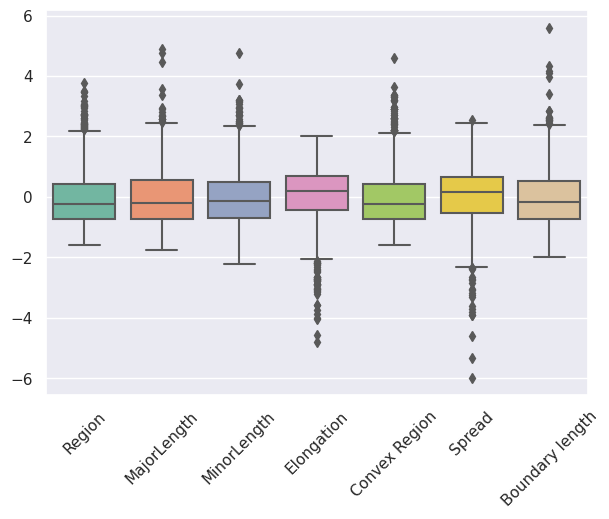

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

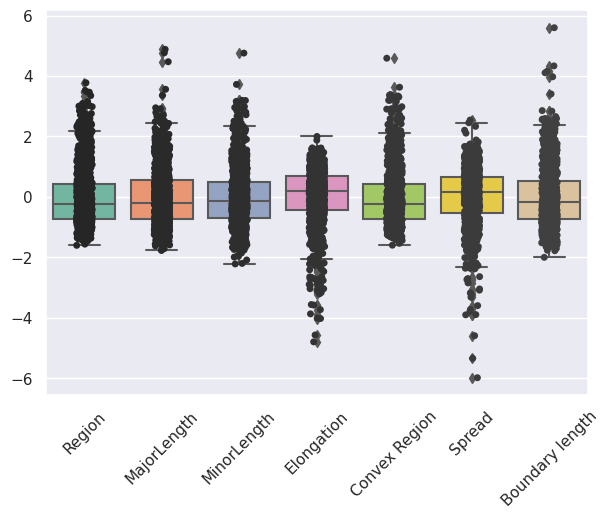

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

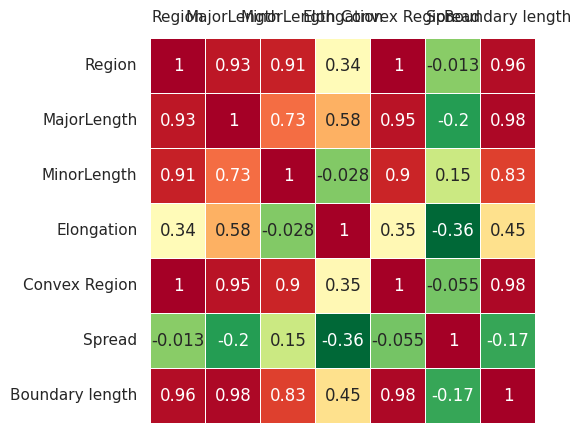

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '')

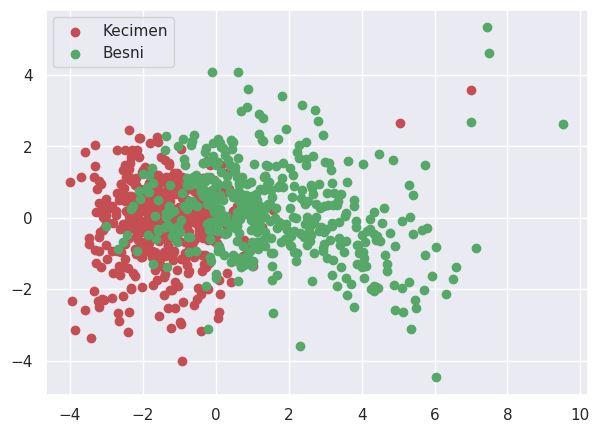

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)
y =df['class']
# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)
#idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('')
plt.ylabel('')


[[ 0.44828422 -0.11609991  0.00548378 -0.11113906 -0.61104765 -0.09983439
  -0.62436686]
 [ 0.4432398   0.13658724 -0.10054797  0.49520464  0.08757032 -0.68557712
   0.22772863]
 [ 0.38938118 -0.37492246  0.23604354 -0.6558767   0.38457775 -0.2390332
   0.12995283]
 [ 0.20297098  0.61082321 -0.62852206 -0.42629865  0.07510412  0.05356014
   0.02044403]
 [ 0.45093833 -0.08761633  0.0366724   0.0558117  -0.39241075  0.47120104
   0.63914127]
 [-0.05636836 -0.66734439 -0.73198093  0.10905256  0.05685884  0.02345199
  -0.00161639]
 [ 0.45082374  0.03417227  0.04430077  0.3398651   0.5551508   0.48726906
  -0.36399975]]


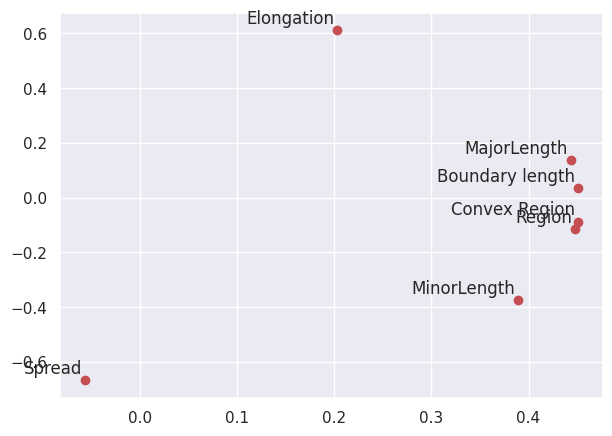

In [ ]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


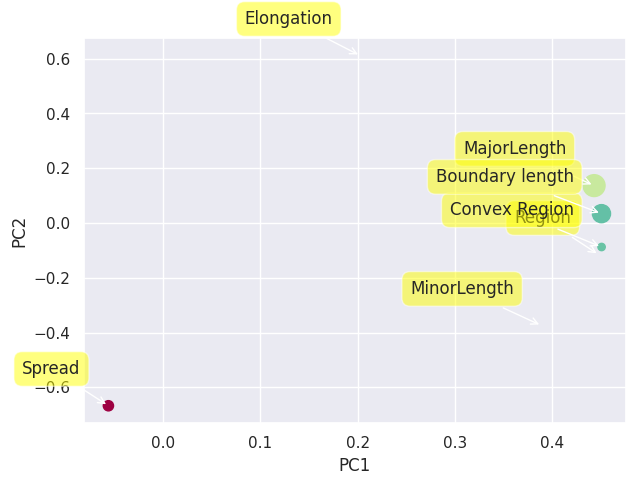

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('PC1')
plt.ylabel('PC2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

[4.83766379e+00 1.45480489e+00 6.29148522e-01 5.68877209e-02
 2.18325269e-02 6.43734371e-03 1.01163378e-03]


Text(0, 0.5, 'Explained variance')

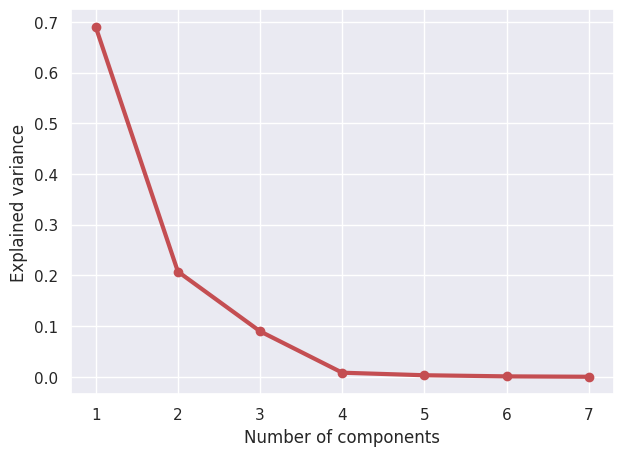

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

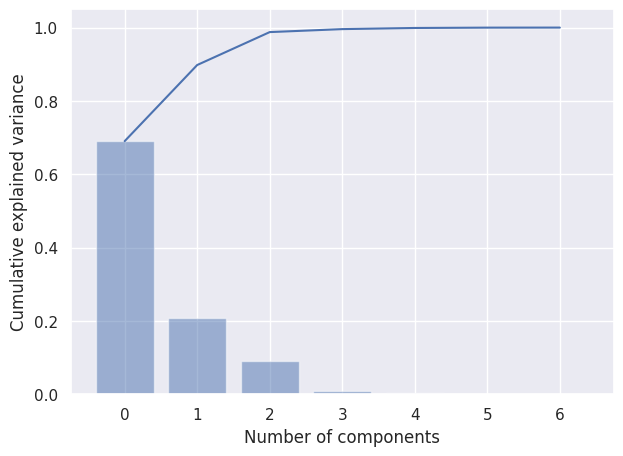

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

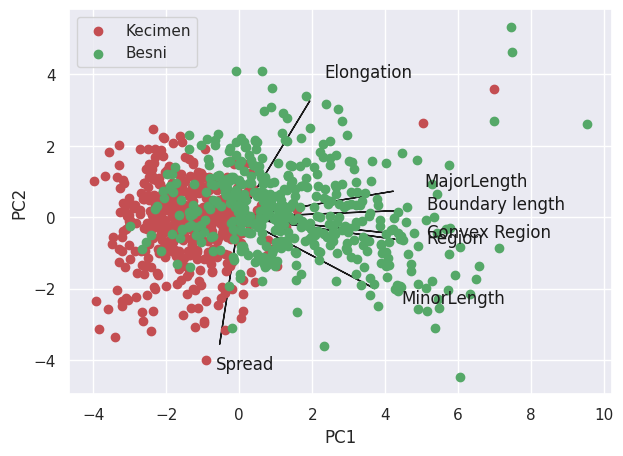

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]


y =df['class']
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)


plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')

plt.legend(loc='upper left')

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

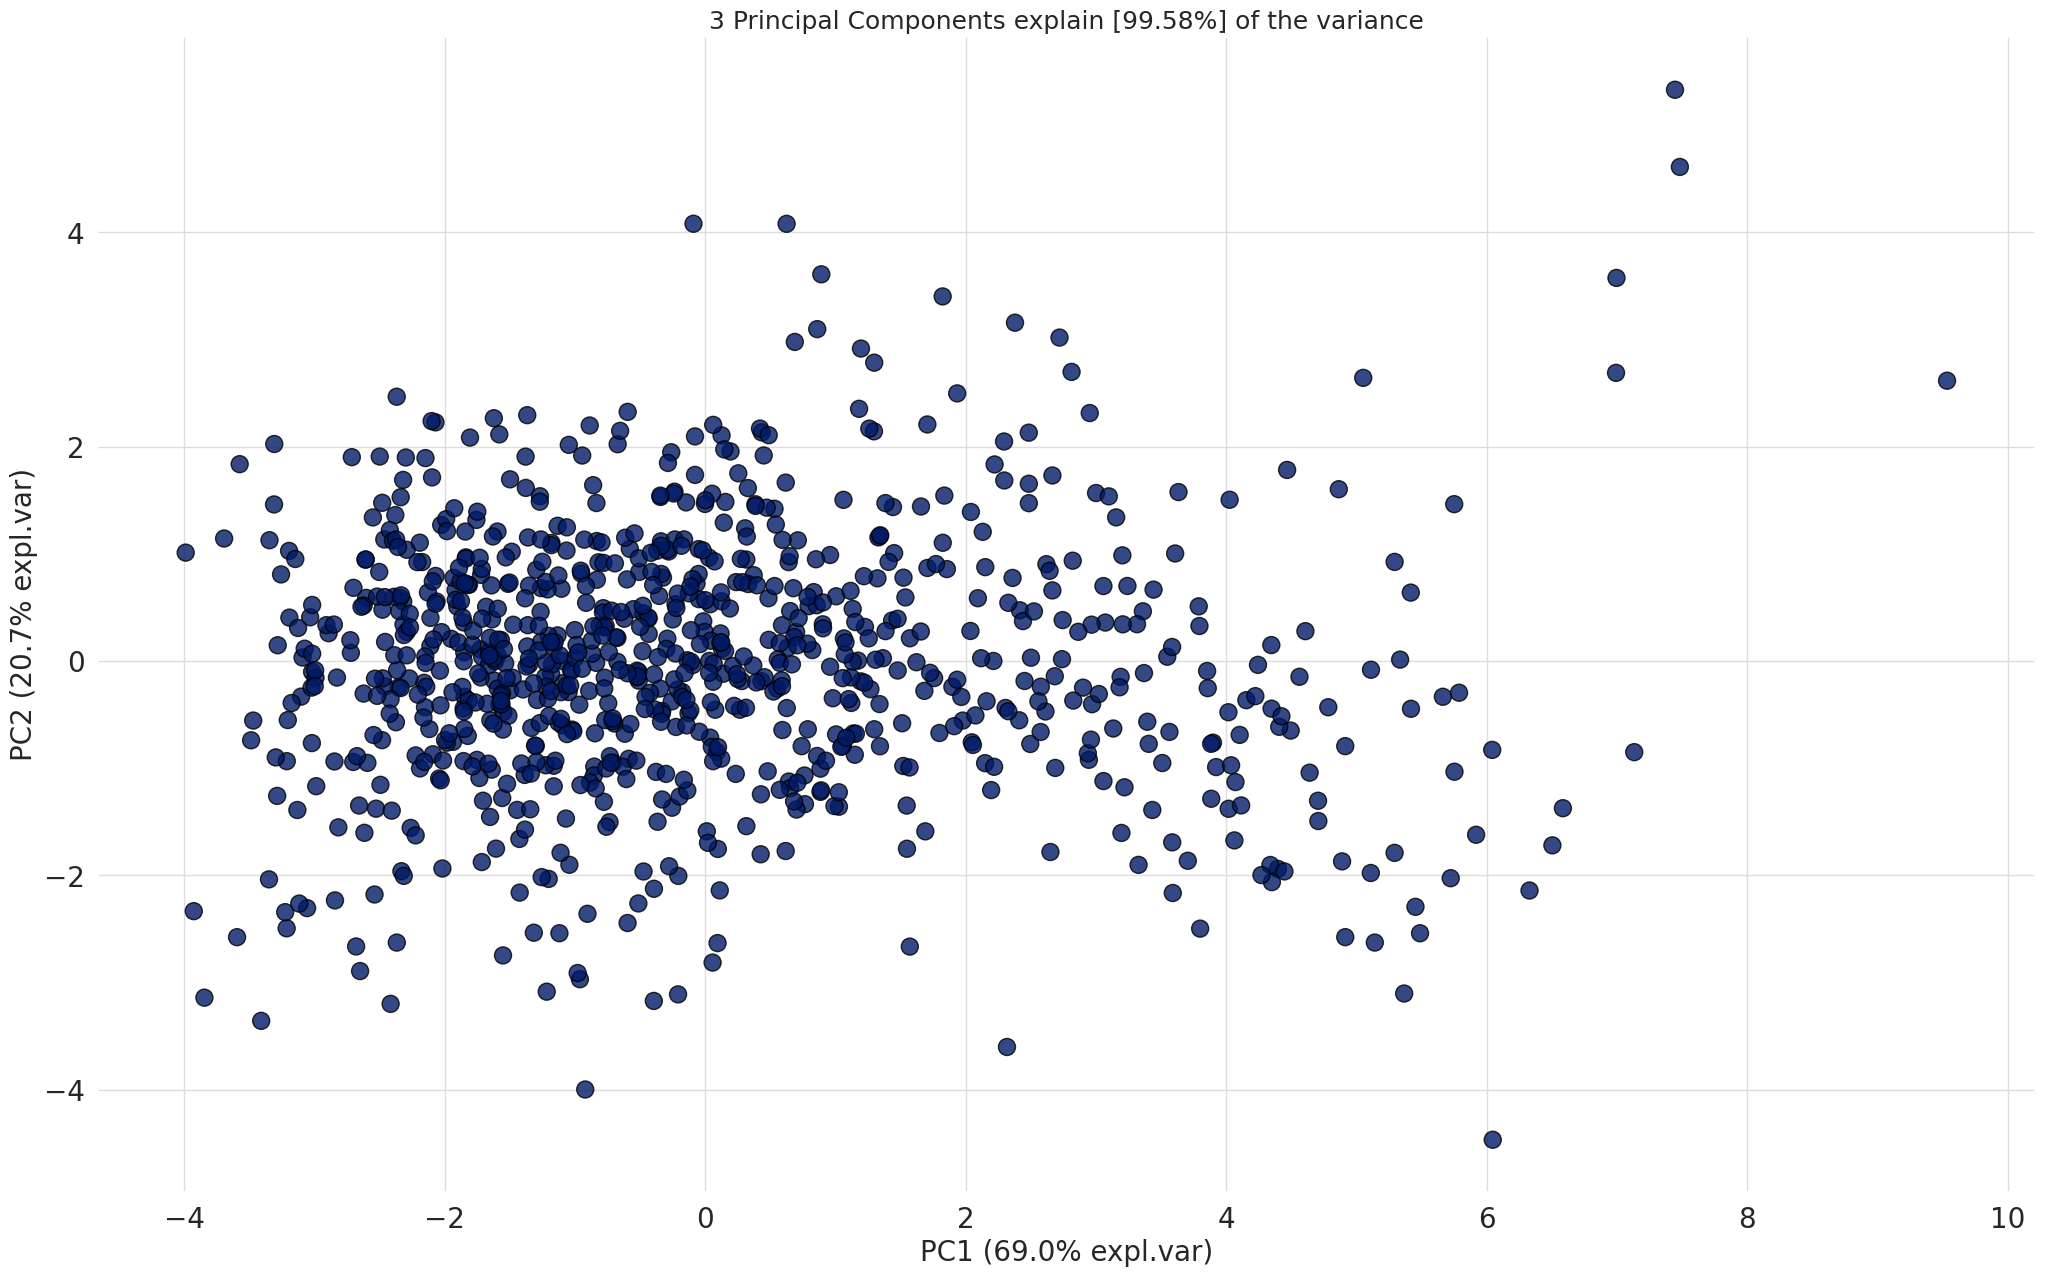

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

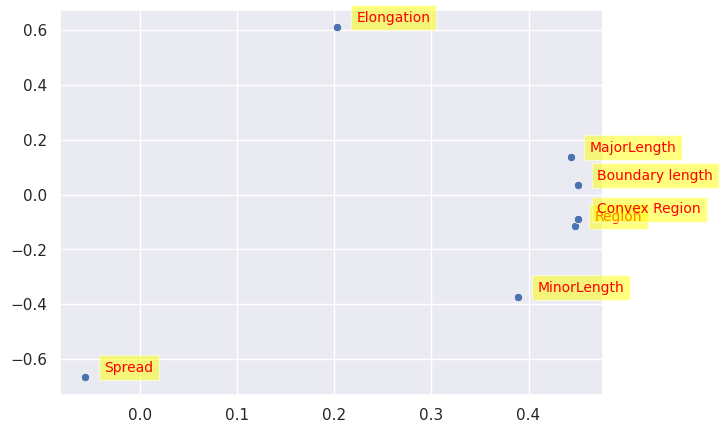

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

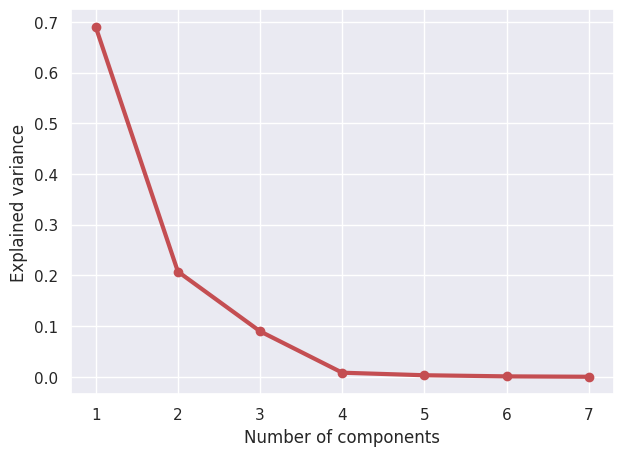

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

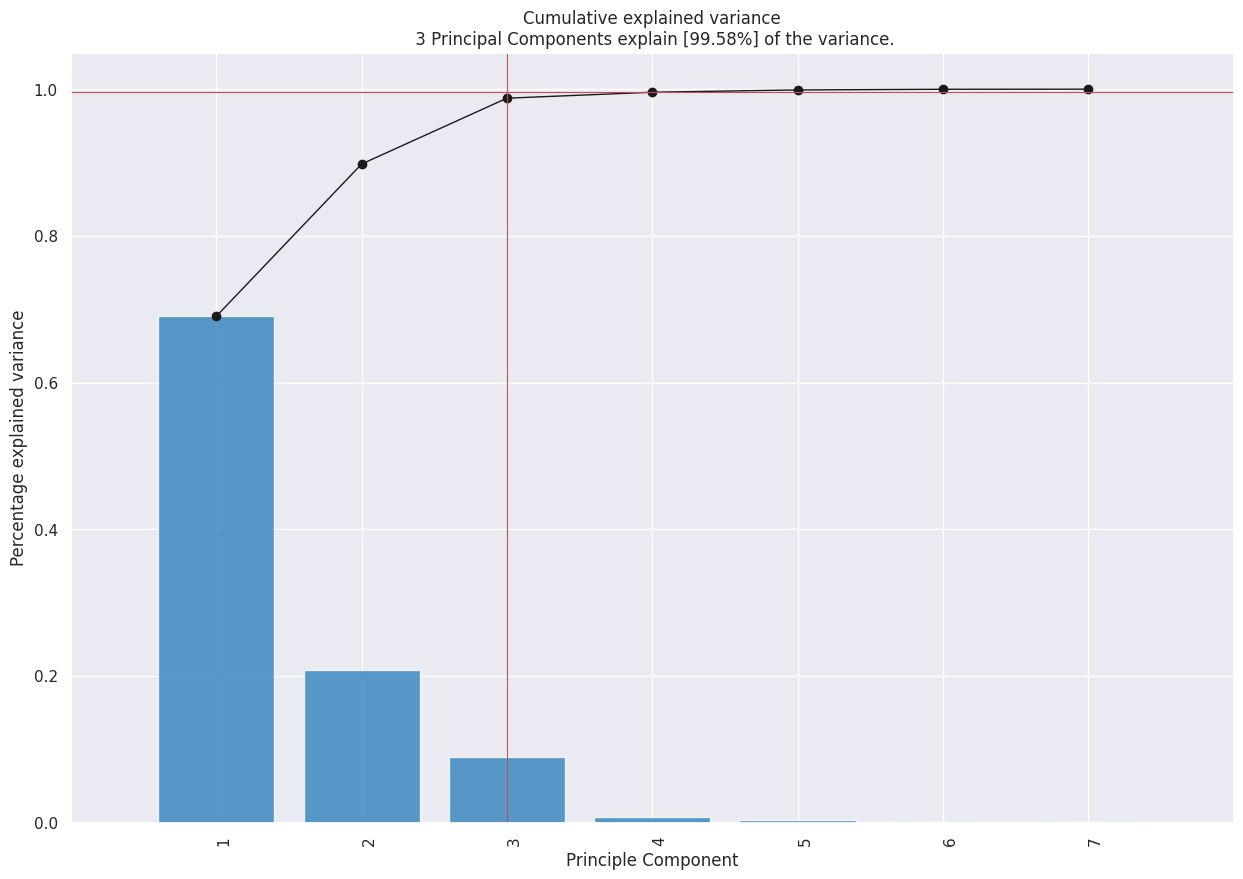

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

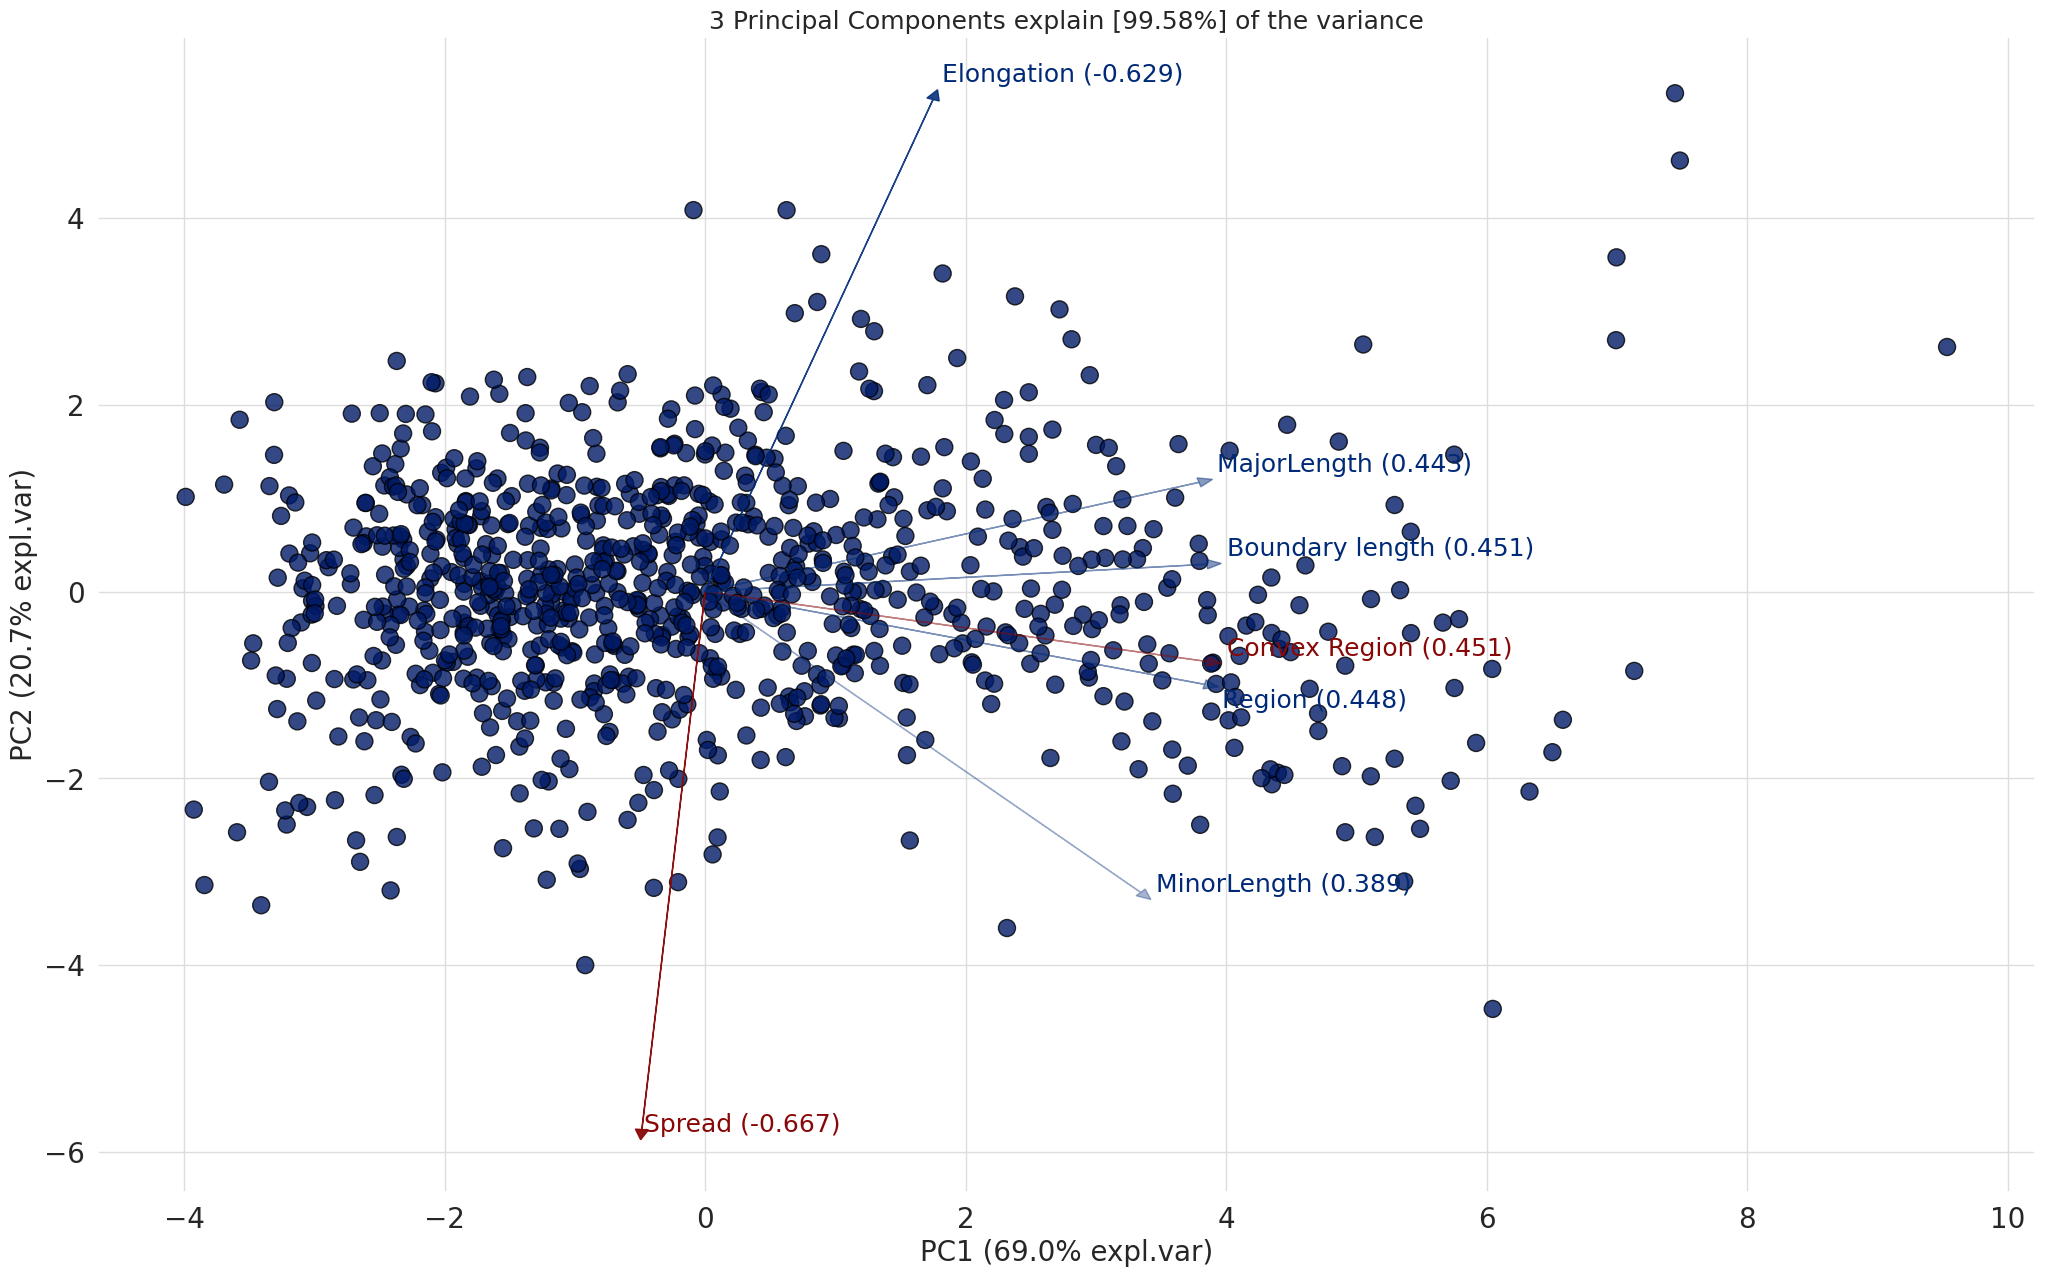

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)', zlabel='PC3 (8.97% expl.var)'>)

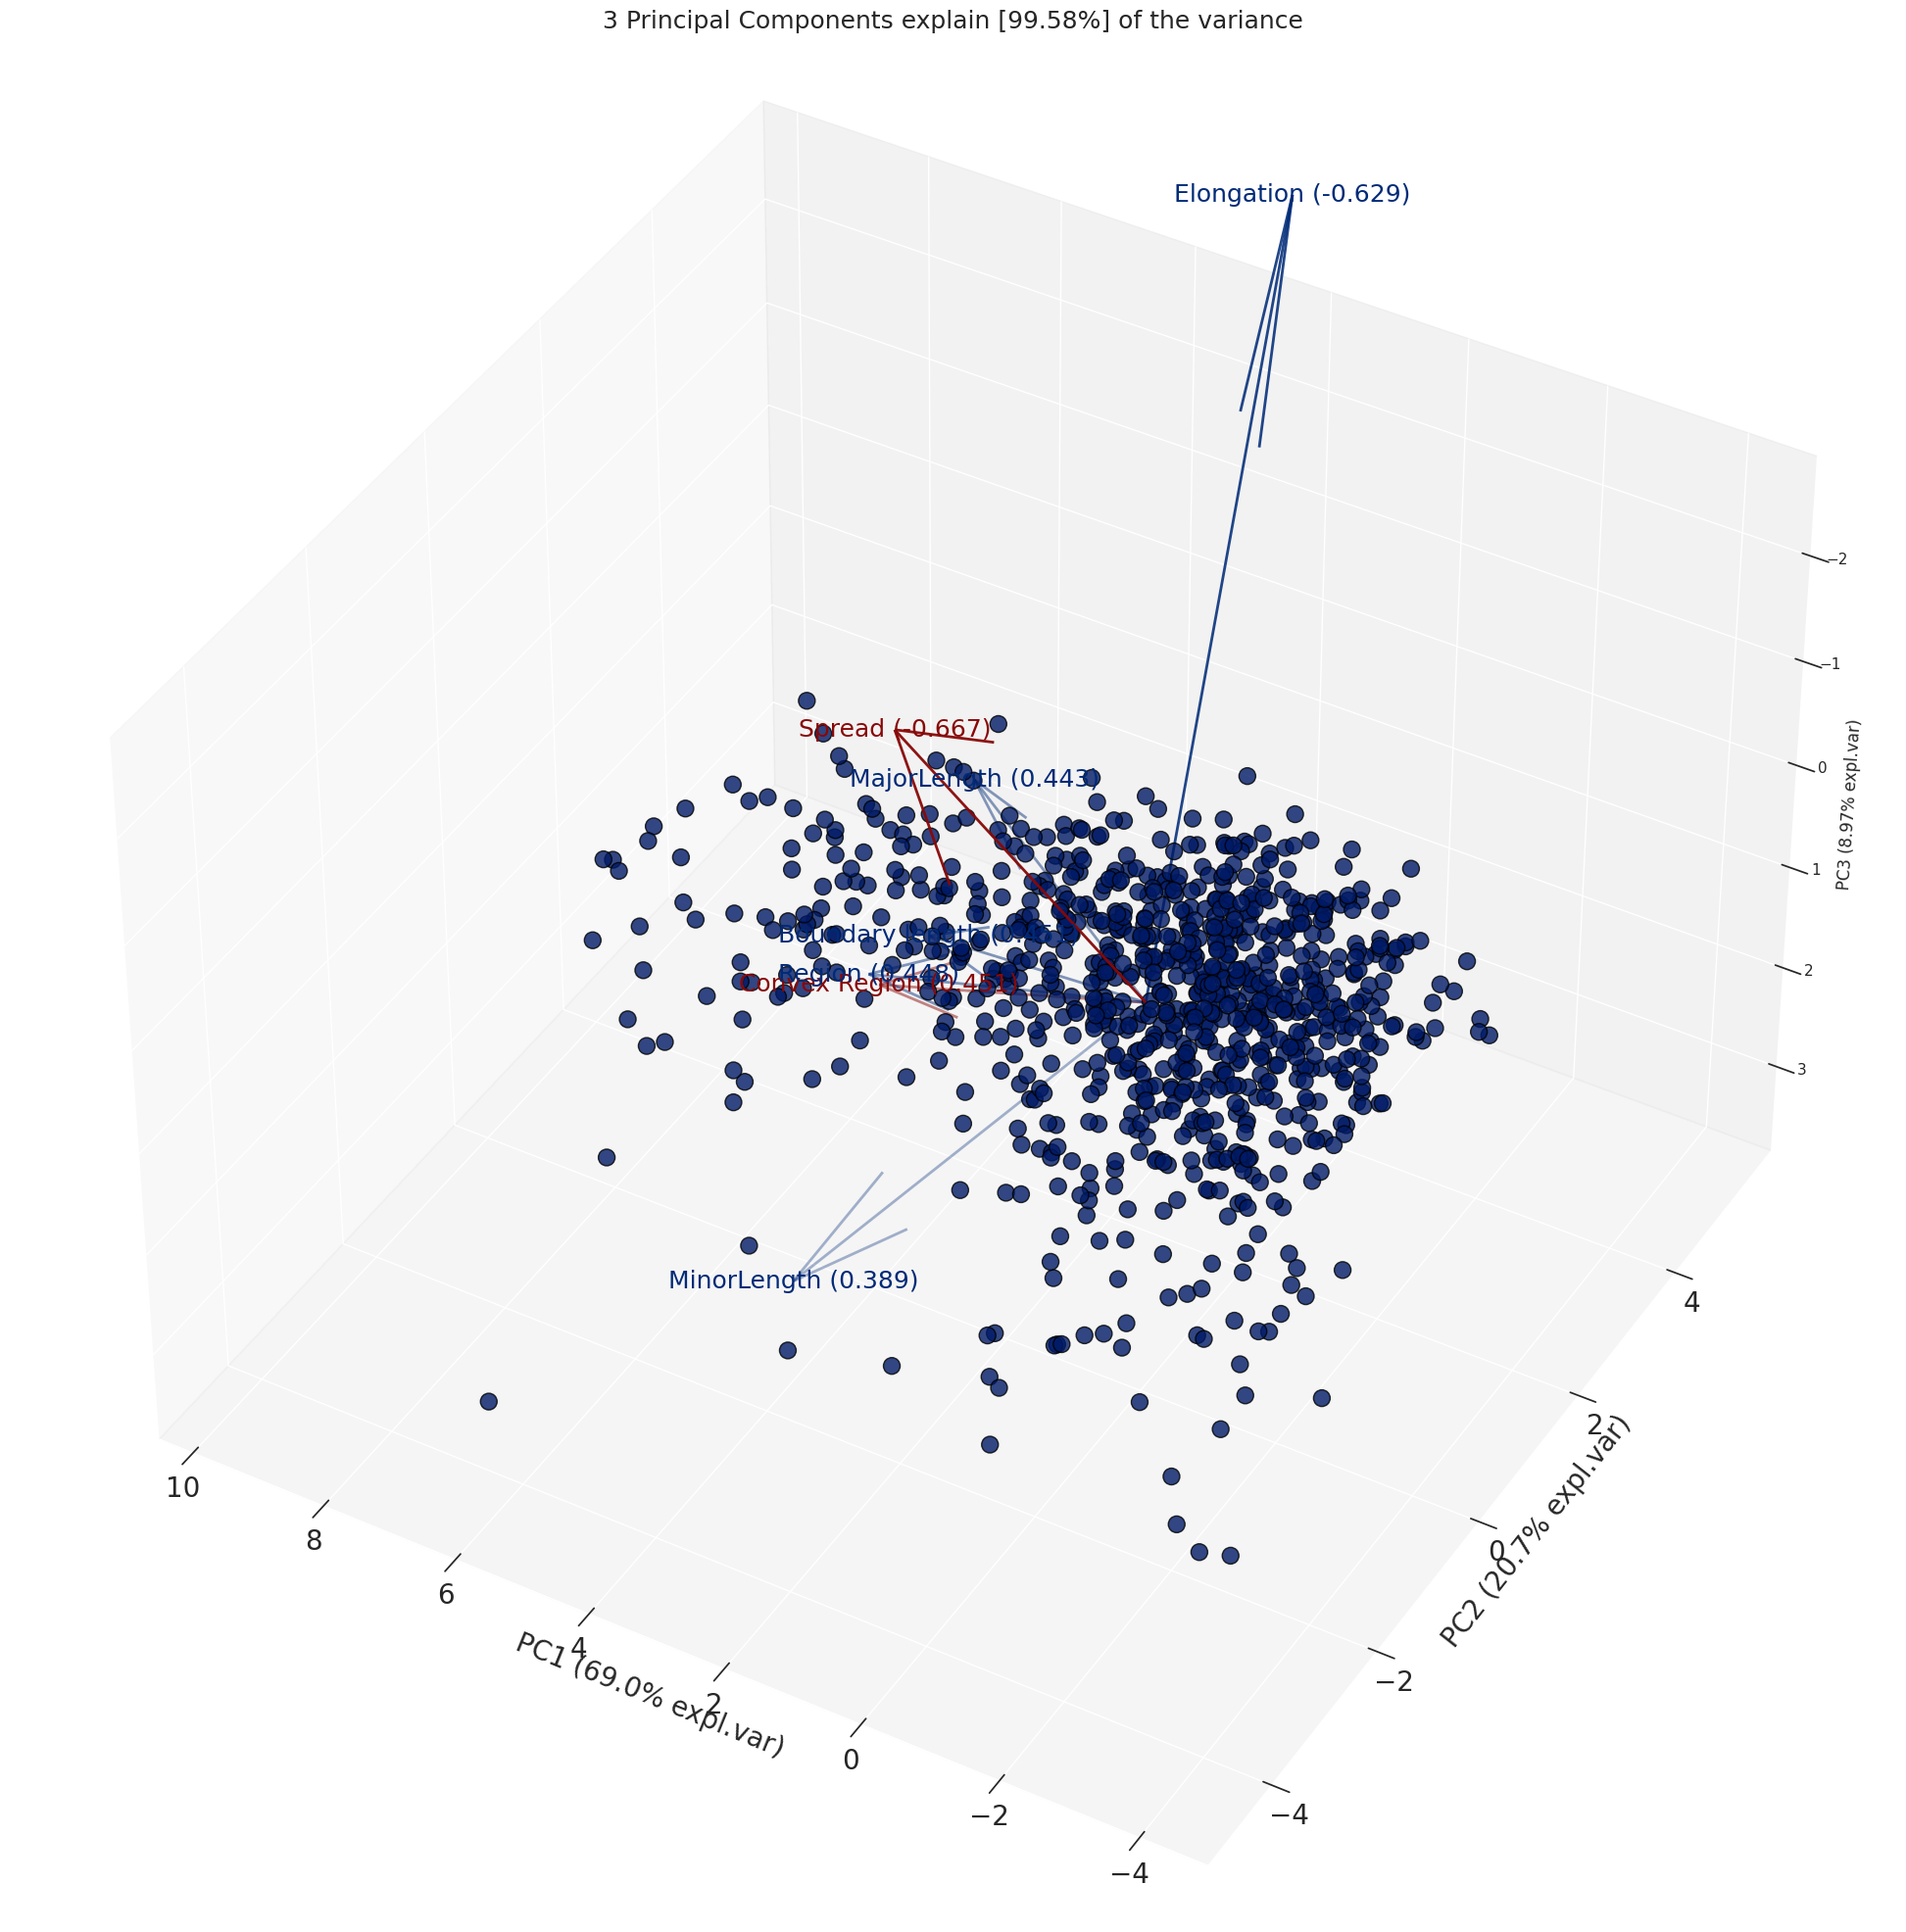

In [ ]:
model.biplot3d(legend=False)

In [ ]:
#For Google Colab only
#from pycaret.utils import enable_colab
#enable_colab()

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [ ]:
svmclf = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
svmclf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
tuned_svmclf = tune_model(svmclf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_svmclf

SGDClassifier(alpha=0.05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.3900000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
ExtTreeClf = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ExtTreeClf

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
tuned_ExtTreeClf = tune_model(ExtTreeClf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_ExtTreeClf

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
!pip install statsmodels --upgrade


In [ ]:
evaluate_model(tuned_dt)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

In [ ]:
knn = create_model('knn')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.23.5


In [ ]:
!pip install numba==0.53

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39.0

In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

ModuleNotFoundError: ignored

In [ ]:

explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('class', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [ ]:

interpret_model(tuned_rf_pca, plot='reason', observation=32, matplotlib='true')

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

In [ ]:
# Using Explainable AI to explore some of the classifiers in my project
# In my project, Extra Trees Classifier (et) has a good classification perfromance for original data
# In my project, decision tree (dt) has a low classification perfromance after appling PCA to my data
# So, I decided to employ Explainable AI to investigate et and dt classifiers more precisely

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = False, pca_components = 3)

In [ ]:
etclf = create_model('et')

In [ ]:
etclf

In [ ]:
tuned_etclf = tune_model(etclf)

In [ ]:
tuned_etclf

In [ ]:
interpret_model(tuned_etclf, plot='summary')

In [ ]:
interpret_model(tuned_etclf, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_etclf, plot='reason')

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
etclf2 = create_model('et')
tuned_etclf2 = tune_model(etclf2)

evaluate_model(tuned_etclf2)
interpret_model(tuned_etclf2, plot='summary')
interpret_model(tuned_etclf2, plot='reason', observation=32)
interpret_model(tuned_etclf2, plot='reason')


In [ ]:
interpret_model(tuned_etclf2, plot='reason', observation=32, matplotlib=True)

In [ ]:
svm3pca=create_model('svm')

In [ ]:
tuned_svm3pca=tune_model(svm3pca)

In [ ]:
knn3pca=create_model('knn')

In [ ]:
tuned_knn3pca=tune_model(knn3pca)

In [ ]:
lr3pca=create_model('lr')

In [ ]:
tuned_lr3pca=tune_model(lr3pca)

In [ ]:
dtclf = create_model('dt')

In [ ]:
dtclf

In [ ]:
tuned_dtclf = tune_model(dtclf)

In [ ]:
tuned_dtclf

In [ ]:
interpret_model(tuned_dtclf, plot='summary')

In [ ]:
interpret_model(tuned_dtclf, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_dtclf, plot='reason')

In [ ]:
# Here, I wanted to see if I use just the 2 first principal components what would be the classification results
# Here, I just chose 2 principal components to see the effects of principla components on classiifcation performances
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

In [ ]:
best_model_pca

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

In [ ]:
evaluate_model(tuned_best_model_pca)

In [ ]:
lr2pca=create_model('lr')

In [ ]:
tuned_lr2pca=tune_model(lr2pca)

In [ ]:
et2pca=create_model('et')

In [ ]:
tuned_et2pca=tune_model(et2pca)

In [ ]:
knn2pca=create_model('knn')

In [ ]:
tuned_knn2pca=tune_model(knn2pca)

In [ ]:
dt2pca=create_model('dt')

In [ ]:
tuned_dt2pca=tune_model(dt2pca)

In [ ]:
svm2pca=create_model('svm')

In [ ]:
tuned_svm2pca=tune_model(svm2pca)